# 패키지 로드

In [1]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
import folium as g
import matplotlib.font_manager as fm

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

sns.set_style("whitegrid")

path = 'NanumBarunGothic.TTF'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False
fm._rebuild()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\seohyun\\OneDrive - 동국대학교\\python\\비어플\\프로젝트_주차수요\\NanumBarunGothic.TTF'

# 0. 데이터 불러오기

In [2]:
age_gender_info=pd.read_csv('age_gender_info.csv')
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
#데이콘측 오류 단지 제외
train_error=['C2085', 'C1397','C2431','C1649', 'C1036','C1095', 'C2051', 'C1218', 'C1894','C2483', 'C1502', 'C1988']
test_error=['C2675','C2335', 'C1327']

mask1=train['단지코드'].isin(train_error)
mask2=test['단지코드'].isin(test_error)

train=train[~mask1].reset_index()
test=test[~mask2].reset_index()

train=train.drop(['index'],axis=1)
test=test.drop(['index'],axis=1)

In [4]:
#column명 바꾸기
train.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철역수', '버스정류장수', '단지내주차면수', '등록차량수']
test.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철역수', '버스정류장수', '단지내주차면수']

In [5]:
#중복행제거
train=train.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [6]:
train.shape

(2549, 15)

-----

# 1. 결측치 처리

### (1) (Train) 부산 임대주택 결측치


  
LH자료에서 부산정관7 국민임대 평형 사용

https://apply.lh.or.kr/LH/index.html?gv_url=SIL::CLCC_SIL_1081.xfdl&gv_menuId=1010205&gv_param=CCR_CNNT_SYS_DS_CD:03,PAN_ID:2015122300009569,LCC:Y#SIL::CLCC_SIL_0060:1010203

https://apply.lh.or.kr/LH/index.html?gv_url=SIL::CLCC_SIL_1081.xfdl&gv_menuId=1010205&gv_param=CCR_CNNT_SYS_DS_CD:03,PAN_ID:2015122300009569,LCC:Y#SIL::CLCC_SIL_0060:1010203

In [7]:
#결측치채우기
#부산광역시 국민임대 (출처:LH)
#임대보증금
train.loc[(train['단지코드']=='C1326')&(train['전용면적']==24.72),'임대보증금']=7505500
train.loc[(train['단지코드']=='C1326')&(train['전용면적']==24.79),'임대보증금']=7505500
train.loc[(train['단지코드']=='C1326')&(train['전용면적']==26.83),'임대보증금']=8148000
train.loc[(train['단지코드']=='C1326')&(train['전용면적']==37.70),'임대보증금']=15868000
train.loc[(train['단지코드']=='C1326')&(train['전용면적']==46.94),'임대보증금']=24768000

#월임대료
train.loc[(train['단지코드']=='C1326')&(train['전용면적']==24.72),'임대료']=114740
train.loc[(train['단지코드']=='C1326')&(train['전용면적']==24.79),'임대료']=114740
train.loc[(train['단지코드']=='C1326')&(train['전용면적']==26.83),'임대료']=152250
train.loc[(train['단지코드']=='C1326')&(train['전용면적']==37.70),'임대료']=212290
train.loc[(train['단지코드']=='C1326')&(train['전용면적']==46.94),'임대료']=277690

### (2) (Train) 강원도 행복주택 결측치  


  
https://apply.lh.or.kr/LH/index.html?gv_url=SIL::CLCC_SIL_1081.xfdl&gv_menuId=1010205&gv_param=CCR_CNNT_SYS_DS_CD:03,PAN_ID:2015122300009569,LCC:Y#SIL::CLCC_SIL_0065:1010203


![image.png](attachment:image.png)

In [8]:
#결측치채우기
#강원도 행복주택
#임대보증금
train.loc[(train['단지코드']=='C1786')&(train['전용면적']==16.91),'임대보증금']=(13181000+13957000)/2
train.loc[(train['단지코드']=='C1786')&(train['전용면적']==26.90),'임대보증금']=(19397000+20538000)/2
train.loc[(train['단지코드']=='C1786')&(train['전용면적']==26.90),'임대보증금']=(19397000+20538000)/2
train.loc[(train['단지코드']=='C1786')&(train['전용면적']==26.90),'임대보증금']=(19397000+20538000)/2

#임대료
train.loc[(train['단지코드']=='C1786')&(train['전용면적']==16.91),'임대료']=(62610+66290)/2
train.loc[(train['단지코드']=='C1786')&(train['전용면적']==26.90),'임대료']=(92130+97550)/2
train.loc[(train['단지코드']=='C1786')&(train['전용면적']==26.90),'임대료']=(92130+97550)/2
train.loc[(train['단지코드']=='C1786')&(train['전용면적']==26.90),'임대료']=(92130+97550)/2

### (3) (Train) 대구광역시 임대주택 결측치  


  

https://apply.lh.or.kr/LH/index.html?gv_url=SIL::CLCC_SIL_1081.xfdl&gv_menuId=1010205&gv_param=CCR_CNNT_SYS_DS_CD:03,PAN_ID:2015122300009569,LCC:Y#SIL::CLCC_SIL_0060:1010203

![image.png](attachment:image.png)


In [9]:
#결측치채우기
#대구광역시 임대주택 결측치
#임대보증금
train.loc[(train['단지코드']=='C2186')&(train['전용면적']==29.17),'임대보증금']=9692000
train.loc[(train['단지코드']=='C2186')&(train['전용면적']==29.34),'임대보증금']=9692000
train.loc[(train['단지코드']=='C2186')&(train['전용면적']==37.43),'임대보증금']=18319000

#임대료
train.loc[(train['단지코드']=='C2186')&(train['전용면적']==29.17),'임대료']=147880
train.loc[(train['단지코드']=='C2186')&(train['전용면적']==29.34),'임대료']=147880
train.loc[(train['단지코드']=='C2186')&(train['전용면적']==37.43),'임대료']=210240

### (4) (Test) 부산 행복주택 결측치  

LH자료에서 창원가포 A-1블록 행복주택 공고문 참고 https://apply.lh.or.kr/LH/index.html?Sls#SIL::CLCC_SIL_0065:1010203

![image.png](attachment:image.png)

In [10]:
#결측치채우기
#부산 행복주택
#임대보증금
test.loc[(test['단지코드']=='C1267')&(test['전용면적']==16.94),'임대보증금']=(10880000+11520000)/2
test.loc[(test['단지코드']=='C1267')&(test['전용면적']==26.85)&(test['전용면적별세대수']==66),'임대보증금']=(16660000+17640000+14700000)/3
test.loc[(test['단지코드']=='C1267')&(test['전용면적']==26.85)&(test['전용면적별세대수']==8),'임대보증금']=18620000
test.loc[(test['단지코드']=='C1267')&(test['전용면적']==36.77),'임대보증금']=(23760000+26400000+19800000+25080000)/4

#임대료
test.loc[(test['단지코드']=='C1267')&(test['전용면적']==16.94),'임대료']=(51680+54720)/2
test.loc[(test['단지코드']=='C1267')&(test['전용면적']==26.85)&(test['전용면적별세대수']==66),'임대료']=(79130+83790+69820)/3
test.loc[(test['단지코드']=='C1267')&(test['전용면적']==26.85)&(test['전용면적별세대수']==8),'임대료']=88440
test.loc[(test['단지코드']=='C1267')&(test['전용면적']==36.77),'임대료']=(112860+125400+94050+119130)/4

### (5) (Test) 강원도 영구임대 결측치  


  

LH 자료에서 화천신읍 공공실버주택 공고문 참고
https://apply.lh.or.kr/LH/index.html?Sls#SIL::CLCC_SIL_0060:1010203

![image.png](attachment:image.png)

In [11]:
#결측치채우기
#강원도 영구임대
#임대보증금
test.loc[(test['단지코드']=='C2152')&(test['전용면적']==24.83),'임대보증금']=8560000
test.loc[(test['단지코드']=='C2152')&(test['전용면적']==33.84),'임대보증금']=11667000

#임대료
test.loc[(test['단지코드']=='C2152')&(test['전용면적']==24.83),'임대료']=87040
test.loc[(test['단지코드']=='C2152')&(test['전용면적']==33.84),'임대료']=118630

### (6) (Test) 대전광역시 영구임대 결측치  


  

LH 자료에서 대전둔산1 영구임대 공고문 참고 https://apply.lh.or.kr/LH/index.html?Sls#SIL::CLCC_SIL_0060:1010203

![image.png](attachment:image.png)

In [12]:
#결측치채우기
#대전광역시 영구임대 결측치
#임대보증금
test.loc[(test['단지코드']=='C1006')&(test['전용면적']==26.37),'임대보증금']=5787000
test.loc[(test['단지코드']=='C1006')&(test['전용면적']==52.74),'임대보증금']=11574000

#임대료
test.loc[(test['단지코드']=='C1006')&(test['전용면적']==26.37),'임대료']=79980
test.loc[(test['단지코드']=='C1006')&(test['전용면적']==52.74),'임대료']=159960

### (7) (Train) 지하철 결측치 처리  

#### 아파트

In [13]:
df_ap=train[train['임대건물구분']=='아파트']
df_ap[df_ap['지하철역수'].isnull()].지역.unique() # 충남, 대전만 지하철역 결측

array(['충청남도', '대전광역시'], dtype=object)

In [14]:
#충청남도 임대주택 위도/경도 데이터
cn_st=pd.read_csv('충남역.csv')
cn_hm=pd.read_csv('충남임대주택.csv')

In [15]:
g_map=g.Map(location=[36.915760,127.127057],zoom_start=13) #처음지도시작

#역표시하기
for i in range(len(cn_st)):
    marker01=g.CircleMarker([cn_st.loc[i]['위도'],cn_st.loc[i]['경도']],
                           radius=50,
                           color='skyblue',
                           fill_color='sky_blue')
    marker01.add_to(g_map)

#임대주택 표시하기
for j in range(len(cn_hm)):
    marker02=g.Marker([cn_hm.loc[j]['위도'],cn_hm.loc[j]['경도']],
                     icon=g.Icon(color='blue'),
                     popup=cn_hm.loc[j]['아파트명'])
    marker02.add_to(g_map)

g_map

논산대교휴먼시아아파트 ~ 논산역 10분거리  
논산조흥아파트 ~ 강경역 10분거리
  
=> 현 데이터에 없는 주택이므로, 모두 0으로 처리

In [16]:
#대전 역 데이터
df_dj=pd.read_csv('대전광역시역.csv')
df_djap=pd.read_csv('대전아파트.csv')

In [17]:
g_map2=g.Map(location=[36.392314,127.314609],zoom_start=13) #처음지도시작

#역표시하기
for k in range(len(df_dj)):
    marker01=g.CircleMarker([df_dj.loc[k]['위도'],df_dj.loc[k]['경도']],
                           radius=50,
                           color='skyblue',
                           fill_color='sky_blue')
    marker01.add_to(g_map2)

    
#임대주택 표시하기
for z in range(len(df_djap)):
    marker02=g.Marker([df_djap.loc[z]['위도'],df_djap.loc[z]['경도']],
                     icon=g.Icon(color='blue'),
                     popup=df_djap.loc[z]['아파트명'])
    marker02.add_to(g_map2)

g_map2

대전노은반석마을8단지 ~ 반석역 : 10분이내  
유성타워아파트 ~ 구암역 : 10분 이내
  
대전지역도 마찬가지로, 위 주택이 데이터에 없으므로 0으로 처리

#### 상가

C:\Users\82102\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\82102\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\82102\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\82102\anaconda3\lib\si

<AxesSubplot:title={'center':'충청남도'}, xlabel='지하철역수', ylabel='count'>

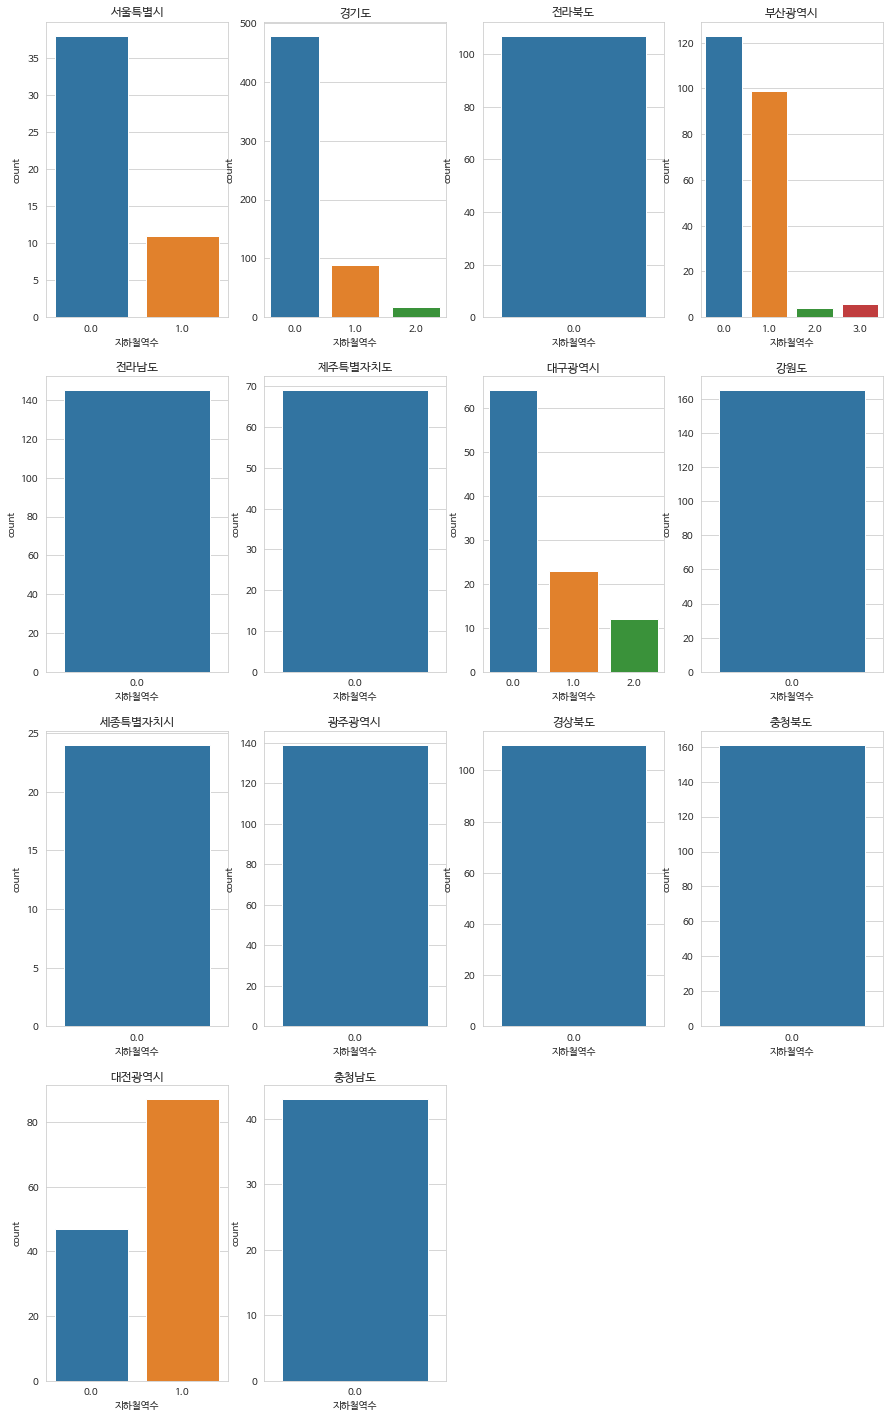

In [18]:
fig = plt.figure(figsize=(15,25))

area01 = fig.add_subplot(4,4,1)
area01.set_title('서울특별시')

area02 = fig.add_subplot(4,4,2)
area02.set_title('경기도')

area03 = fig.add_subplot(4,4,3)
area03.set_title('전라북도')

area04 = fig.add_subplot(4,4,4)
area04.set_title('부산광역시')

area05 = fig.add_subplot(4,4,5)
area05.set_title('전라남도')

area06 = fig.add_subplot(4,4,6)
area06.set_title('제주특별자치도')

area07 = fig.add_subplot(4,4,7)
area07.set_title('대구광역시')

area08 = fig.add_subplot(4,4,8)
area08.set_title('강원도')

area09 = fig.add_subplot(4,4,9)
area09.set_title('세종특별자치시')

area10 = fig.add_subplot(4,4,10)
area10.set_title('광주광역시')

area11 = fig.add_subplot(4,4,11)
area11.set_title('경상북도')

area12 = fig.add_subplot(4,4,12)
area12.set_title('충청북도')

area13 = fig.add_subplot(4,4,13)
area13.set_title('대전광역시')

area14 = fig.add_subplot(4,4,14)
area14.set_title('충청남도')

train_region = train[train['지역']=='서울특별시']
region_list = train_region['지하철역수']
sns.countplot(region_list, ax=area01)

train_region = train[train['지역']=='경기도']
region_list = train_region['지하철역수']
sns.countplot(region_list, ax=area02)

train_region = train[train['지역']=='전라북도']
region_list = train_region['지하철역수']
sns.countplot(region_list, ax=area03)

train_region = train[train['지역']=='부산광역시']
region_list = train_region['지하철역수']
sns.countplot(region_list, ax=area04)

train_region = train[train['지역']=='전라남도']
region_list = train_region['지하철역수']
sns.countplot(region_list, ax=area05)

train_region = train[train['지역']=='제주특별자치도']
region_list = train_region['지하철역수']
sns.countplot(region_list, ax=area06)

train_region = train[train['지역']=='대구광역시']
region_list = train_region['지하철역수']
sns.countplot(region_list, ax=area07)

train_region = train[train['지역']=='강원도']
region_list = train_region['지하철역수']
sns.countplot(region_list, ax=area08)

train_region = train[train['지역']=='세종특별자치시']
region_list = train_region['지하철역수']
sns.countplot(region_list, ax=area09)

train_region = train[train['지역']=='광주광역시']
region_list = train_region['지하철역수']
sns.countplot(region_list, ax=area10)

train_region = train[train['지역']=='경상북도']
region_list = train_region['지하철역수']
sns.countplot(region_list, ax=area11)

train_region = train[train['지역']=='충청북도']
region_list = train_region['지하철역수']
sns.countplot(region_list, ax=area12)

train_region = train[train['지역']=='대전광역시']
region_list = train_region['지하철역수']
sns.countplot(region_list, ax=area13)

train_region = train[train['지역']=='충청남도']
region_list = train_region['지하철역수']
sns.countplot(region_list, ax=area14)

=> 지역별로 큰 차이 없으니 0으로 채우기

In [19]:
#공공분양 아파트 0으로 처리 
temp_index = train[train['공급유형']=='공공분양'].index
train.임대료[temp_index]=0
train.임대보증금[temp_index]=0

#장기전세 0으로 처리
temp_index = train[train['공급유형']=='장기전세'].index
train.임대료[temp_index]=0

#object -> float 변환
temp_region_1=[]
temp_type_1=[]
for i in train.index:
    try:
        train.임대보증금[i] = float(train.임대보증금[i])
        train.임대료[i] = float(train.임대료[i])
    except:
        temp_region_1.append(train.지역[i])
        temp_type_1.append(train.공급유형[i])

<ipython-input-19-613bf9ef7fe5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.임대료[temp_index]=0
C:\Users\82102\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-19-613bf9ef7fe5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.임대보증금[temp_index]=0
<ipython-input-19-613bf9ef7fe5>:8: SettingWithCopyWarning: 
A valu

In [20]:
train.임대료 = train.임대료.astype('float')
train.임대보증금 = train.임대보증금.astype('float')

In [21]:
train.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       285
임대료         285
지하철역수       151
버스정류장수        0
단지내주차면수       0
등록차량수         0
dtype: int64

In [22]:
temp_index = train[train['지하철역수'].isnull()].index
train.지하철역수[temp_index]=0

# 위 결과, 지하철역수는 0으로 처리하는게 맞을듯

<ipython-input-22-8cb8e5a8fef3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.지하철역수[temp_index]=0


### (8) (Train) 임대상가 결측치 처리  
  
random forest로 결측치 처리

In [23]:
def 리스트만들기1(col):
    temp_list = list(set(train[col]))
    new_list = []
    for i in range(len(temp_list)):
        new_list.append(temp_list[i])
    return new_list

In [24]:
# 범주형데이터 수치형으로 전환
list1_0 = 리스트만들기1('단지코드')
list1_1 = 리스트만들기1('임대건물구분')
list1_2 = 리스트만들기1('지역')
list1_3 = 리스트만들기1('자격유형')

In [25]:
region_list_train = list1_2 # 추후 병합을 위함

In [26]:
for i in train.index:
    train.단지코드[i] = list1_0.index(train.단지코드[i])
    train.임대건물구분[i] = list1_1.index(train.임대건물구분[i])
    train.지역[i] = list1_2.index(train.지역[i])
    train.자격유형[i] = list1_3.index(train.자격유형[i])

<ipython-input-26-14610b846550>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.단지코드[i] = list1_0.index(train.단지코드[i])
<ipython-input-26-14610b846550>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.임대건물구분[i] = list1_1.index(train.임대건물구분[i])
<ipython-input-26-14610b846550>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.지역[i] = list1_2.index(train.지역[i])
<ipython-input-26-14610b846550>:5: SettingWithCopyWarning: 
A

In [27]:
train_notna = train[train['공급유형'] != '임대상가'].reset_index()
temp_notna_공급유형 = train_notna['공급유형']
temp_notna_등록차량수 = train_notna['등록차량수']
train_notna = train_notna.drop(['공급유형', '등록차량수'],axis=1)

train_na = train[train['공급유형'] == '임대상가'].reset_index()
temp_na_등록차량수 = train_na['등록차량수']
train_na = train_na.drop(['공급유형', '임대보증금', '임대료', '등록차량수'],axis=1)

##### - 머신러닝 진행

In [28]:
train_notna_feat = train_notna.drop(['임대보증금', '임대료'], axis=1)
train_notna_lab1 = train_notna['임대료']

x_train1, x_test1, y_train1, y_test1  = train_test_split(train_notna_feat, train_notna_lab1, test_size=0.2)

model1 = RandomForestRegressor()
model1.fit(x_train1, y_train1)
print(model1.score(x_train1, y_train1))
print(model1.score(x_test1, y_test1))

train_na_result1 = model1.predict(train_na)

0.9846277908171537
0.9226169389628421


In [29]:
train_notna_lab2 = train_notna['임대보증금']

x_train2, x_test2, y_train2, y_test2  = train_test_split(train_notna_feat, train_notna_lab2, test_size=0.2)

model2 = RandomForestRegressor()
model2.fit(x_train2, y_train2)
print(model2.score(x_train2, y_train2))
print(model2.score(x_test2, y_test2))

train_na_result2 = model2.predict(train_na)

0.9834576652750479
0.8019983446432465


##### - 원데이터와 합치기

In [30]:
train_na['임대료']=train_na_result1
train_na['임대보증금']=train_na_result2

train_notna['공급유형']=temp_notna_공급유형
train_notna['등록차량수']=temp_notna_등록차량수
train_na['공급유형']='임대상가'
train_na['등록차량수']=temp_na_등록차량수

train = pd.concat([train_notna,train_na])
train = train.reset_index().drop(['level_0','index'],axis=1)
train

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,공급유형,등록차량수
0,60,545,0,2,33.48,276,17.0,12,9216000.0,82940.0,0.0,3.0,624.0,국민임대,205.0
1,60,545,0,2,39.60,60,17.0,12,12672000.0,107130.0,0.0,3.0,624.0,국민임대,205.0
2,60,545,0,2,39.60,20,17.0,12,12672000.0,107130.0,0.0,3.0,624.0,국민임대,205.0
3,60,545,0,2,46.90,38,17.0,12,18433000.0,149760.0,0.0,3.0,624.0,국민임대,205.0
4,60,545,0,2,46.90,19,17.0,12,18433000.0,149760.0,0.0,3.0,624.0,국민임대,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,111,697,1,9,31.84,1,0.0,8,13291900.0,92230.1,0.0,4.0,128.0,임대상가,86.0
2545,111,697,1,9,63.68,1,0.0,8,34616330.0,151917.9,0.0,4.0,128.0,임대상가,86.0
2546,111,697,1,9,137.49,1,0.0,8,61251440.0,390743.6,0.0,4.0,128.0,임대상가,86.0
2547,18,481,1,2,31.84,1,5.0,8,12612730.0,99462.2,0.0,1.0,65.0,임대상가,62.0


In [31]:
train.isnull().sum() # 결측치 완벽히 채워졌는지 다시 확인

단지코드        0
총세대수        0
임대건물구분      0
지역          0
전용면적        0
전용면적별세대수    0
공가수         0
자격유형        0
임대보증금       0
임대료         0
지하철역수       0
버스정류장수      0
단지내주차면수     0
공급유형        0
등록차량수       0
dtype: int64

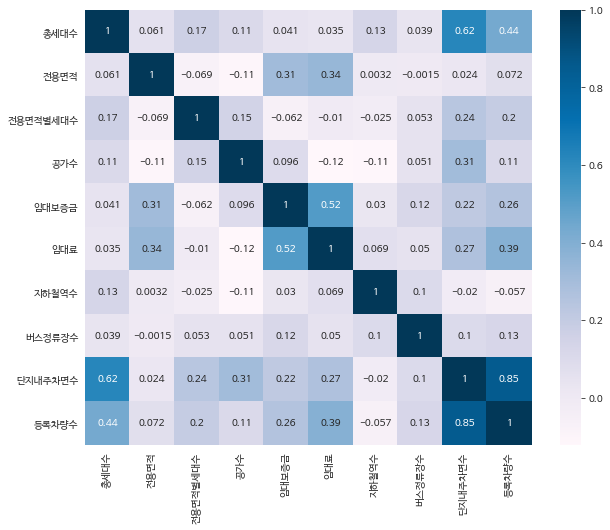

In [32]:
#상관관계
plt.figure(figsize = (10, 8))
sns.heatmap(train.corr(), annot=True, cmap=plt.cm.PuBu, linecolor='white');

#### (9) (Test) 지하철, 자격유형 결측치 채우기  
  
자격유형, 지하철 등 나머지 결측치 채우기

In [33]:
#결측치확인
test.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          2
임대보증금       177
임대료         177
지하철역수        38
버스정류장수        0
단지내주차면수       0
dtype: int64

In [34]:
test[test['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0


In [35]:
test[test['단지코드']=='C2411'] #누락된 자격유형 = A

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수
193,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000,100720,0.0,2.0,840.0
194,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000,100720,0.0,2.0,840.0
195,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000,100720,0.0,2.0,840.0
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
197,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000,171480,0.0,2.0,840.0


In [36]:
test[test['단지코드']=='C2253'].head(3) #누락된 자격유형 = C

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0
259,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000,83020,0.0,2.0,173.0
260,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000,83020,0.0,2.0,173.0


In [37]:
test.loc[(test['단지코드']=='C2411')&(test['전용면적']==46.9),'자격유형']='A'
test.loc[(test['단지코드']=='C2253')&(test['전용면적']==26.37),'자격유형']='C'

In [38]:
test[test['지하철역수'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수
68,C1472,548,아파트,충청남도,국민임대,36.62,116,2.0,A,8738000,87380,NaN,1.0,442.0
69,C1472,548,아파트,충청남도,국민임대,39.51,56,2.0,A,9985000,99850,NaN,1.0,442.0
70,C1472,548,아파트,충청남도,국민임대,46.79,56,2.0,A,13731000,131070,NaN,1.0,442.0
71,C1472,548,아파트,충청남도,국민임대,46.90,86,2.0,A,13731000,131070,NaN,1.0,442.0
72,C1472,548,아파트,충청남도,국민임대,51.93,234,2.0,A,18726000,143550,NaN,1.0,442.0
100,C1083,427,아파트,대전광역시,국민임대,39.85,40,0.0,A,12483000,106090,NaN,6.0,384.0
101,C1083,427,아파트,대전광역시,국민임대,51.48,64,0.0,A,32459000,187260,NaN,6.0,384.0
102,C1083,427,아파트,대전광역시,국민임대,51.99,107,0.0,A,32459000,187260,NaN,6.0,384.0
103,C1083,427,아파트,대전광역시,국민임대,51.99,96,0.0,A,32459000,187260,NaN,6.0,384.0
104,C1083,427,아파트,대전광역시,국민임대,59.45,120,0.0,A,39950000,243430,NaN,6.0,384.0


=> C1472 : 지도를 통해서 '논산대교휴먼시아' 아파트는 논산역과 10분 이내였으므로 지하철역수 '1' 로 처리  
  
나머지 C1083, C1318은 0으로 처리. C2177 상가 지하철역수도 0으로 처리

In [39]:
test.loc[(test['단지코드']=='C1472'),'지하철역수']=1
test.loc[(test['단지코드']=='C1083'),'지하철역수']=0
test.loc[(test['단지코드']=='C2177'),'지하철역수']=0
test.loc[(test['단지코드']=='C1327'),'지하철역수']=0
test.loc[(test['단지코드']=='C1318'),'지하철역수']=0

In [40]:
test.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       177
임대료         177
지하철역수         0
버스정류장수        0
단지내주차면수       0
dtype: int64

#### (10) (Test) 임대상가 결측치 처리  
  
동일하게 random forest 이용 

In [41]:
def 리스트만들기1(col):
    temp_list = list(set(test[col]))
    new_list = []
    for i in range(len(temp_list)):
        new_list.append(temp_list[i])
    return new_list

In [42]:
# 범주형데이터 수치형으로 전환
list2_0 = 리스트만들기1('단지코드')
list2_1 = 리스트만들기1('임대건물구분')
list2_2 = 리스트만들기1('지역')
list2_3 = 리스트만들기1('자격유형')

In [43]:
region_list_test = list2_2 # 추후 병합을 위함

In [44]:
for i in test.index:
    test.단지코드[i] = list2_0.index(test.단지코드[i])
    test.임대건물구분[i] = list2_1.index(test.임대건물구분[i])
    test.지역[i] = list2_2.index(test.지역[i])
    test.자격유형[i] = list2_3.index(test.자격유형[i])

<ipython-input-44-044a2c06c069>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.단지코드[i] = list2_0.index(test.단지코드[i])
<ipython-input-44-044a2c06c069>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.임대건물구분[i] = list2_1.index(test.임대건물구분[i])
<ipython-input-44-044a2c06c069>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.지역[i] = list2_2.index(test.지역[i])
<ipython-input-44-044a2c06c069>:5: SettingWithCopyWarning: 
A value

In [45]:
test_notna = test[test['공급유형'] != '임대상가'].reset_index()
temp_notna_공급유형 = test_notna['공급유형']
#temp_notna_등록차량수 = test_notna['등록차량수']
test_notna = test_notna.drop(['공급유형'],axis=1)

test_na = test[test['공급유형'] == '임대상가'].reset_index()
#temp_na_등록차량수 = test_na['등록차량수']
test_na = test_na.drop(['공급유형', '임대보증금', '임대료'],axis=1)

##### - 머신러닝 진행

In [46]:
test_notna_feat = test_notna.drop(['임대보증금', '임대료'], axis=1)
test_notna_lab1 = test_notna['임대료']

x_train1, x_test1, y_train1, y_test1  = train_test_split(test_notna_feat, test_notna_lab1, test_size=0.2)

model1 = RandomForestRegressor()
model1.fit(x_train1, y_train1)
print(model1.score(x_train1, y_train1))
print(model1.score(x_test1, y_test1))

test_na_result1 = model1.predict(test_na)

0.983340040114534
0.8665645172400851


In [47]:
test_notna_lab2 = test_notna['임대보증금']

x_train2, x_test2, y_train2, y_test2  = train_test_split(test_notna_feat, test_notna_lab2, test_size=0.2)

model2 = RandomForestRegressor()
model2.fit(x_train2, y_train2)
print(model2.score(x_train2, y_train2))
print(model2.score(x_test2, y_test2))

test_na_result2 = model2.predict(test_na)

0.9816916050431647
0.8302399064715111


##### - 원데이터와 합치기

In [48]:
test_na['임대료']=test_na_result1
test_na['임대보증금']=test_na_result2

test_notna['공급유형']=temp_notna_공급유형
test_na['공급유형']='임대상가'

test = pd.concat([test_notna,test_na])
test = test.reset_index().drop(['level_0','index'],axis=1)
test

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,공급유형
0,52,754,0,0,39.79,116,14.0,9,22830000,189840,0.0,2.0,683.0,국민임대
1,52,754,0,0,46.81,30,14.0,10,36048000,249930,0.0,2.0,683.0,국민임대
2,52,754,0,0,46.90,112,14.0,9,36048000,249930,0.0,2.0,683.0,국민임대
3,52,754,0,0,46.90,120,14.0,9,36048000,249930,0.0,2.0,683.0,국민임대
4,52,754,0,0,51.46,60,14.0,9,43497000,296780,0.0,2.0,683.0,국민임대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,89,627,1,9,32.46,1,0.0,7,8.80213e+06,91556.2,0.0,5.0,131.0,임대상가
1004,89,627,1,9,34.86,1,0.0,7,1.06855e+07,91305.3,0.0,5.0,131.0,임대상가
1005,89,627,1,9,35.76,1,0.0,7,1.1434e+07,95493.9,0.0,5.0,131.0,임대상가
1006,89,627,1,9,50.08,1,0.0,7,1.88832e+07,165628,0.0,5.0,131.0,임대상가


In [49]:
test.isnull().sum() #결측치 완벽하게 처리되어있는지 확인

단지코드        0
총세대수        0
임대건물구분      0
지역          0
전용면적        0
전용면적별세대수    0
공가수         0
자격유형        0
임대보증금       0
임대료         0
지하철역수       0
버스정류장수      0
단지내주차면수     0
공급유형        0
dtype: int64

In [50]:
#결측치 처리된 데이터 csv로 저장

train.to_csv('train2.csv',header=True,index=False)
test.to_csv('test2.csv',header=True,index=False)

# 2. 이상치 처리


##### 연속형 변수: 전용면적, 임대보증금, 임대료

In [51]:
train2 = pd.read_csv('train2.csv')
test2 = pd.read_csv('test2.csv')

C:\Users\82102\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\82102\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\82102\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

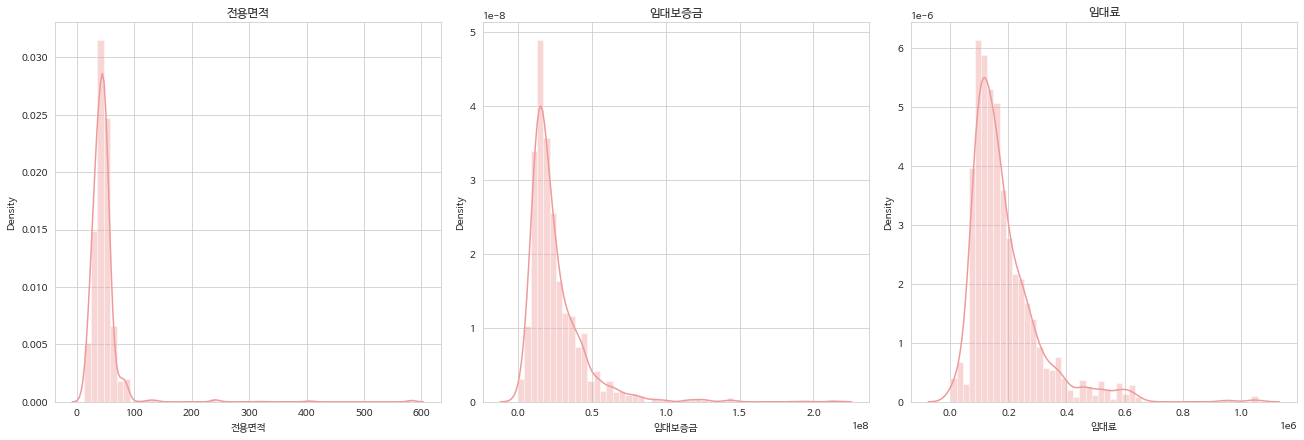

In [52]:
# 로그변환 전
test_num = ['전용면적', '임대보증금', '임대료']
f, ax = plt.subplots(1, 3, figsize=(18,6), constrained_layout=True)
k = [0, 1, 2]
for i, k in zip(test_num, k):
    sns.distplot(train2[i], ax = ax[k], color='#EF9A9A')
    ax[k].title.set_text(i)
    plt.rc('axes', unicode_minus = False)

In [53]:
train2.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '전용면적', '전용면적별세대수', '공가수', '자격유형',
       '임대보증금', '임대료', '지하철역수', '버스정류장수', '단지내주차면수', '공급유형', '등록차량수'],
      dtype='object')

In [54]:
# 로그변환보단 스케일링이 적합할 듯
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
temp = train2[['전용면적', '임대보증금', '임대료']]

scaler.fit(temp) 
temp_scaled = scaler.transform(temp)

temp_scaled = pd.DataFrame(data = temp_scaled, columns=['전용면적', '임대보증금', '임대료'])
train2['전용면적'] = temp_scaled['전용면적']
train2['임대보증금'] = temp_scaled['임대보증금']
train2['임대료'] = temp_scaled['임대료']

C:\Users\82102\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\82102\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\82102\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

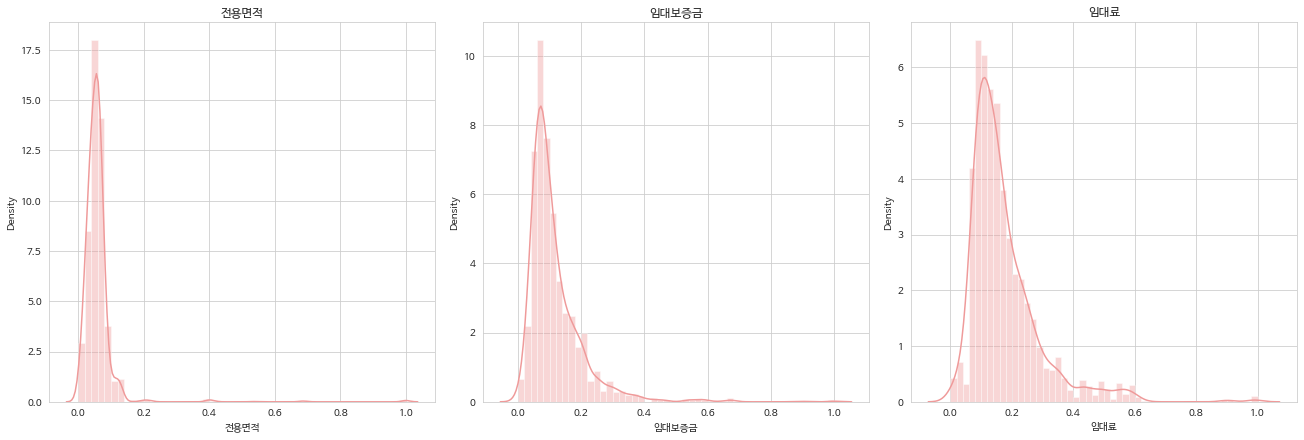

In [55]:
# 로그변환 후
test_num = ['전용면적', '임대보증금', '임대료']
f, ax = plt.subplots(1, 3, figsize=(18,6), constrained_layout=True)
k = [0, 1, 2]
for i, k in zip(test_num, k):
    sns.distplot(train2[i], ax = ax[k],color='#EF9A9A')
    ax[k].title.set_text(i)
    plt.rc('axes', unicode_minus = False)

In [56]:
train2.to_csv('train2.csv',header=True,index=False)
test2.to_csv('test2.csv',header=True,index=False)

In [57]:
#데이콘데이터
age=pd.read_csv('age_gender_info.csv')
train=pd.read_csv('train2.csv')
test=pd.read_csv('test2.csv')

#외부변수
car=pd.read_csv('자동차등록대수현황_시도별.csv',encoding='euc-kr')
car_age=pd.read_csv('운전면허소지자현황_연령대.csv',encoding='euc-kr')
car1=pd.read_csv('1인당_자동차_등록대수_시도_시_군_구.csv',encoding='euc-kr')
gg=pd.read_csv('가구원수.csv',encoding='euc-kr')

In [58]:
#지역번호 -> 지역명 - train
region={'지역':[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
       '지역명':['충청북도','서울특별시','경상남도','경상북도','대구광역시','세종특별자치시','전라남도'
,'강원도','충청남도','제주특별자치도','경기도','울산광역시','대전광역시','전라북도','광주광역시','부산광역시']}

region=pd.DataFrame(region)
train=pd.merge(train,region,how='inner',on='지역',right_index=True)
train.head(3)

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,공급유형,등록차량수,지역명
0,60,545,0,2,0.036546,276,17.0,12,0.043093,0.078391,0.0,3.0,624.0,국민임대,205.0,경상남도
1,60,545,0,2,0.047269,60,17.0,12,0.059253,0.101254,0.0,3.0,624.0,국민임대,205.0,경상남도
2,60,545,0,2,0.047269,20,17.0,12,0.059253,0.101254,0.0,3.0,624.0,국민임대,205.0,경상남도


In [59]:
#지역번호 -> 지역명 - test
region_test={'지역':[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],
            '지역명':['경기도', '부산광역시', '전라북도', '경상남도', '충청남도', '대전광역시', '제주특별자치도', '강원도',
       '울산광역시', '경상북도', '충청북도', '광주광역시', '전라남도', '대구광역시', '세종특별자치시']}

region_test=pd.DataFrame(region_test)
test=pd.merge(test,region_test,how='inner',on='지역',right_index=True)
test.head(3)

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,공급유형,지역명
0,52,754,0,0,39.79,116,14.0,9,22830000.0,189840.0,0.0,2.0,683.0,국민임대,경기도
1,52,754,0,0,46.81,30,14.0,10,36048000.0,249930.0,0.0,2.0,683.0,국민임대,경기도
2,52,754,0,0,46.90,112,14.0,9,36048000.0,249930.0,0.0,2.0,683.0,국민임대,경기도


# 3. 파생변수 생성

#### (1) 지역 클러스터링

In [60]:
region=train.loc[:,['지역명','등록차량수','단지내주차면수']]
region.head(3)

,지역명,등록차량수,단지내주차면수
0,경상남도,205.0,624.0
1,경상남도,205.0,624.0
2,경상남도,205.0,624.0


In [61]:
#중복데이터 삭제 => 지역별 unique한 등록차량수 만들기 
region=region.drop_duplicates(subset=None,keep='first',inplace=False,ignore_index=False)
region.shape

(411, 3)

Text(0.5, 1.0, '단지내주차면수와 등록차량수 간의 상관관계 시각화')

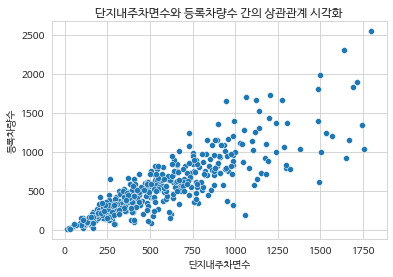

In [62]:
#산점도
#등록차량수와 가장 상관관계가 높은 변수 = 단지내주차면수 
sns.scatterplot(x='단지내주차면수',y='등록차량수',data=region)
plt.title('단지내주차면수와 등록차량수 간의 상관관계 시각화')

<ipython-input-63-0ca084513df0>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  region2=region.groupby('지역명')['등록차량수','단지내주차면수'].sum()


Text(0.5, 1.0, '지역별 단지내주차면수와 등록차량수 상관관계')

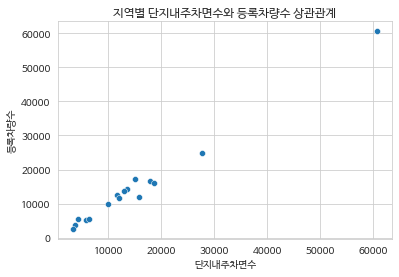

In [63]:
#지역별 그룹화
region2=region.groupby('지역명')['등록차량수','단지내주차면수'].sum()

#산점도
sns.scatterplot(x='단지내주차면수',y='등록차량수',data=region2)
plt.title('지역별 단지내주차면수와 등록차량수 상관관계')

<AxesSubplot:xlabel='단지내주차면수', ylabel='등록차량수'>

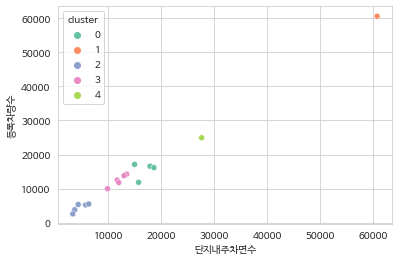

In [64]:
#클러스터링
region_num=region2.iloc[:,1:3]

kmeans=KMeans(n_clusters=5)
kmeans.fit(region_num)

result_by_sklearn=region2.copy()
result_by_sklearn['cluster']=kmeans.labels_
result_by_sklearn.head(2)

#잘 나눠졌는지 확인
sns.scatterplot(x='단지내주차면수',y='등록차량수',hue='cluster',data=result_by_sklearn,palette='Set2')

<AxesSubplot:>

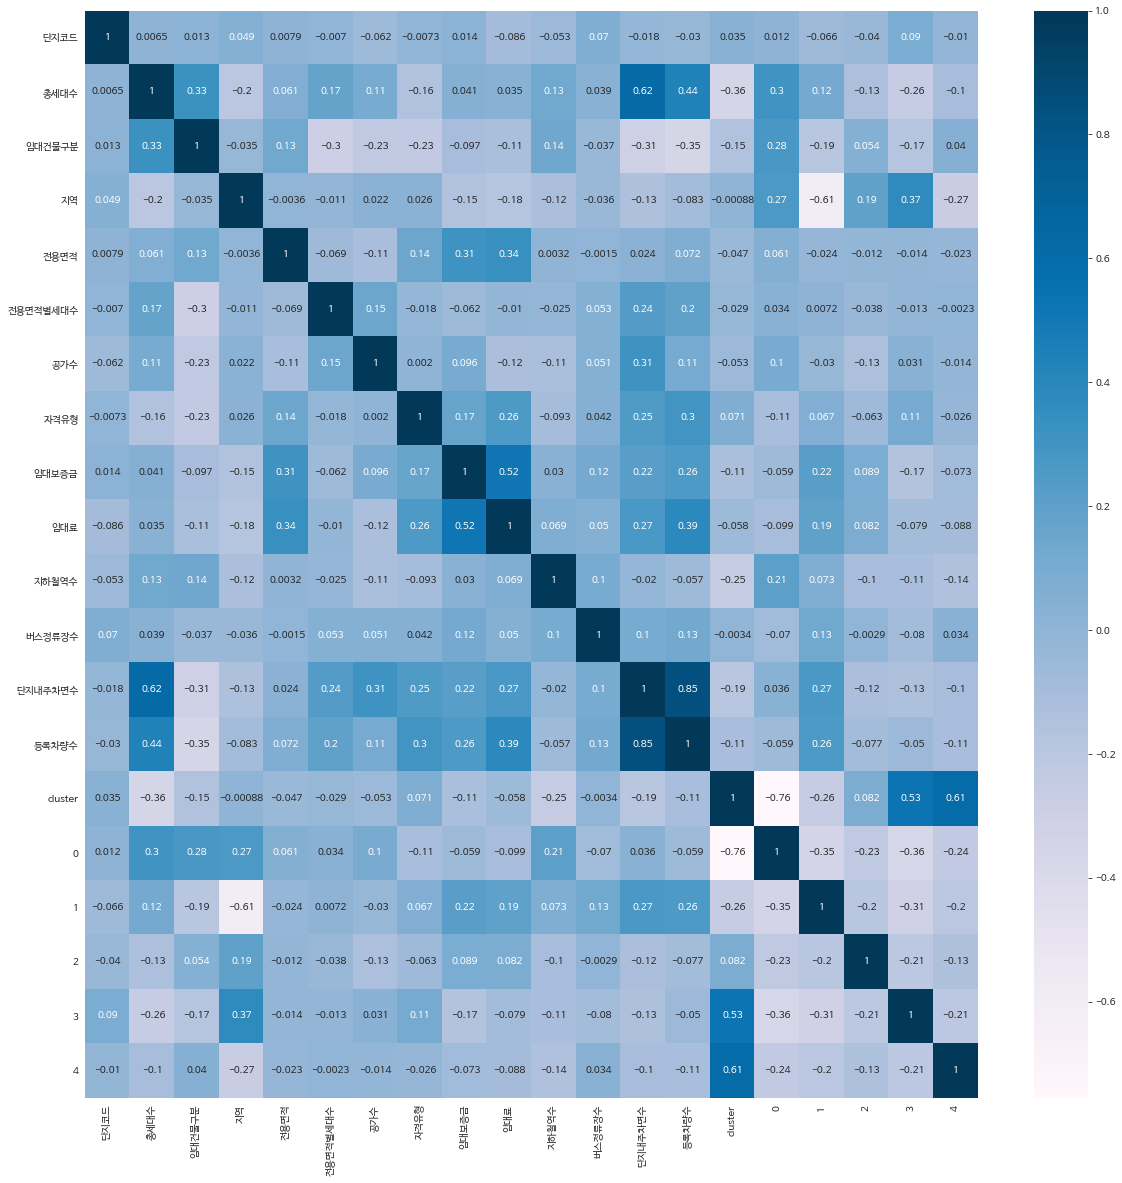

In [65]:
result_by_sklearn=result_by_sklearn.reset_index() #지역명 인덱스 해제

#원래 데이터에 이어붙이기
#공통 변수 지역명에 의해 merging
result=result_by_sklearn.loc[:,['지역명','cluster']]
train2=pd.merge(train,result,how='inner',on='지역명',right_index=True)
train2.head(3)

#one-hot encoding 
dummy1=pd.get_dummies(train2.cluster)
train3=pd.concat([train2,dummy1],axis=1)

plt.figure(figsize=(20,20))
sns.heatmap(train3.corr(),annot=True,cmap=plt.cm.PuBu,linecolor='white')

- Group  
- 그룹0 :강원도,경상북도,대구광역시,전라남도,전라북도  
- 그룹1 : 경기도  
- 그룹2 : 광주광역시,대전광역시,부산광역시,충청북도  
- 그룹3 : 서울특별시,세종특별자치시,울산광역시,제주특별자치도,충청남도  
- 그룹4 : 경상남도  
  
-> 1번 : 0.26 / 4번 : -0.11 이 상관계수가 그나마 높음

In [66]:
test.head(2)

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,공급유형,지역명
0,52,754,0,0,39.79,116,14.0,9,22830000.0,189840.0,0.0,2.0,683.0,국민임대,경기도
1,52,754,0,0,46.81,30,14.0,10,36048000.0,249930.0,0.0,2.0,683.0,국민임대,경기도


In [67]:
#test-data

a1=['강원도','경상북도','대구광역시','전라남도','전라북도']
a2=['경기도']
a3=['경상남도']
a4=['서울특별시','세종특별자치시','울산광역시','제주특별자치도','충청남도']
a5=['광주광역시','대전광역시','부산광역시','충청북도']

test_t=[]

for i in range(0,len(test)) :
    if test.loc[i,'지역명'] in a1 :
        test_t.append(0)
    elif test.loc[i,'지역명'] in a2 :
        test_t.append(1)
    elif test.loc[i,'지역명'] in a3 :
        test_t.append(4)
    elif test.loc[i,'지역명'] in a4:
        test_t.append(3)
    else :
        test_t.append(2)
    

In [68]:
test['cluster']=test_t

#### (2) 파생변수 - 공가율

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '강원도'),
  Text(1, 0, '경기도'),
  Text(2, 0, '경상남도'),
  Text(3, 0, '경상북도'),
  Text(4, 0, '광주광역시'),
  Text(5, 0, '대구광역시'),
  Text(6, 0, '대전광역시'),
  Text(7, 0, '부산광역시'),
  Text(8, 0, '서울특별시'),
  Text(9, 0, '세종특별자치시'),
  Text(10, 0, '울산광역시'),
  Text(11, 0, '전라남도'),
  Text(12, 0, '전라북도'),
  Text(13, 0, '제주특별자치도'),
  Text(14, 0, '충청남도'),
  Text(15, 0, '충청북도')])

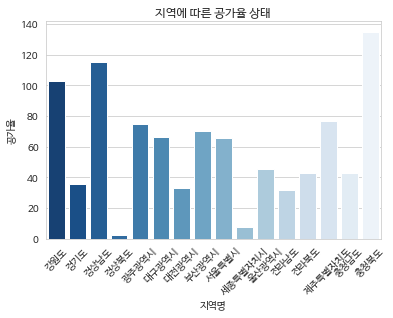

In [69]:
train3['공가율']=(train3['공가수']/train3['총세대수'])*100
region_공가=train3.loc[:,['지역명','공가율']]
region_공가=region_공가.drop_duplicates(subset=None,keep='first',inplace=False,ignore_index=False)
region_공가=region_공가.groupby('지역명')['공가율'].sum()
region_공가=region_공가.reset_index()

sns.barplot(x='지역명',y='공가율',data=region_공가,palette='Blues_r')
plt.title('지역에 따른 공가율 상태')
plt.xticks(rotation=45)

In [70]:
#test-data
test['공가율']=(test['공가수']/test['총세대수'])*100

#### (3) 공급유형+자격유형

In [71]:
#자격유형 번호 -> 자격유형 알파벳
train_2=pd.read_csv('train.csv') #결측치 채우기전 train
a1=pd.DataFrame(train_2.자격유형.unique())
a2=pd.DataFrame(train3.자격유형.unique())
a3=pd.concat([a1,a2],axis=1)
a3.columns=['자격유형2','자격유형']
train4=pd.merge(train3,a3,how='inner',on='자격유형',right_index=True)

#공급유형+자격유형 e.g) 임대상가_H
train4['건물자격유형']=train4['공급유형']+'_'+train4['자격유형2']
train4.head(2)

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,...,지역명,cluster,0,1,2,3,4,공가율,자격유형2,건물자격유형
0,60,545,0,2,0.036546,276,17.0,12,0.043093,0.078391,...,경상남도,4,0,0,0,0,1,3.119266,A,국민임대_A
1,60,545,0,2,0.047269,60,17.0,12,0.059253,0.101254,...,경상남도,4,0,0,0,0,1,3.119266,A,국민임대_A


In [72]:
#test-data
#자격유형 번호 -> 자격유형 알파벳
test_2=pd.read_csv('test.csv') #결측치 채우기전 train
b1=pd.DataFrame(test_2.자격유형.unique())
b2=pd.DataFrame(test.자격유형.unique())
b3=pd.concat([b1,b2],axis=1)
b3.columns=['자격유형2','자격유형']
test=pd.merge(test,b3,how='inner',on='자격유형',right_index=True)

#공급유형+자격유형 e.g) 임대상가_H
test['건물자격유형']=test['공급유형']+'_'+test['자격유형2']
test.head(2)

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역수,버스정류장수,단지내주차면수,공급유형,지역명,cluster,공가율,자격유형2,건물자격유형
0,52,754,0,0,39.79,116,14.0,9,22830000.0,189840.0,0.0,2.0,683.0,국민임대,경기도,1,1.856764,H,국민임대_H
2,52,754,0,0,46.90,112,14.0,9,36048000.0,249930.0,0.0,2.0,683.0,국민임대,경기도,1,1.856764,H,국민임대_H


In [73]:
#자격유형 재범주화

# 자격유형
for i in train4.index:
    if train4.자격유형[i] in [6,7,10]:
        train4.자격유형[i] = 6
    elif train4.자격유형[i] in [8,9,11]:
        train4.자격유형[i] = 8
    elif train4.자격유형[i] in [3,5,12]:
        train4.자격유형[i] = 3 
for i in test.index:
    if test.자격유형[i] in [6,7,10]:
        test.자격유형[i] = 6
    elif test.자격유형[i] in [8,9,11]:
        test.자격유형[i] = 8
    elif test.자격유형[i] in [3,5,12]:
        test.자격유형[i] = 3


# 공급유형
for i in train4.index:
    if train4.공급유형[i] in ['공공임대(50년)', '공공임대(10년)', '공공임대(5년)', '공공임대(분납)']:
        train4.공급유형[i] = '공공임대(기타)'
for i in test.index:
    if test.공급유형[i] in ['공공임대(50년)', '공공임대(10년)', '공공임대(5년)', '공공임대(분납)']:
        test.공급유형[i] = '공공임대(기타)'

<ipython-input-73-6573ee44a7a4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train4.자격유형[i] = 3
<ipython-input-73-6573ee44a7a4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train4.자격유형[i] = 8
<ipython-input-73-6573ee44a7a4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train4.자격유형[i] = 6
<ipython-input-73-6573ee44a7a4>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

#### (4) 지역 - 수도권 / 광역시 변수

In [74]:
region_list_train=['세종특별자치시', '울산광역시', '경상북도', '서울특별시', '대구광역시', '전라남도', '부산광역시', '경상남도', '경기도', '제주특별자치도', '대전광역시', '충청북도', '충청남도', '전라북도', '강원도', '광주광역시']
region_list_test=['세종특별자치시', '울산광역시', '대구광역시', '전라남도', '부산광역시', '광주광역시', '경상남도', '경기도', '제주특별자치도', '대전광역시', '충청북도', '충청남도', '전라북도', '강원도', '경상북도']

In [75]:
# 수도권, 광역시 더미변수 생성
train4['수도권']=0;train4['광역시']=0;test['수도권']=0;test['광역시']=0
for i in range(len(train4)):
    if train4.지역[i] in [region_list_train.index('서울특별시'), region_list_train.index('경기도')]:
        train4['수도권'][i] = 1
    else:
        train4['수도권'][i] = 0

for i in range(len(train4)):
    if train4.지역[i] in [region_list_train.index('부산광역시'), region_list_train.index('대구광역시'), region_list_train.index('대전광역시'), region_list_train.index('광주광역시'), region_list_train.index('울산광역시'), region_list_train.index('세종특별자치시'),region_list_train.index('제주특별자치도')]:
        train4['광역시'][i] = 1
    else:
        train4['광역시'][i] = 0

for i in range(len(test)):
    if test.지역[i] in [region_list_test.index('경기도')]:
        test['수도권'][i] = 1
    else:
        test['수도권'][i] = 0

for i in range(len(test)):
    if test.지역[i] in [region_list_test.index('부산광역시'), region_list_test.index('대구광역시'), region_list_test.index('대전광역시'), region_list_test.index('광주광역시'), region_list_test.index('울산광역시'),region_list_train.index('세종특별자치시'),region_list_train.index('제주특별자치도')]:
        test['광역시'][i] = 1
    else:
        test['광역시'][i] = 0

<ipython-input-75-87e478881228>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train4['수도권'][i] = 0
<ipython-input-75-87e478881228>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train4['수도권'][i] = 1
<ipython-input-75-87e478881228>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train4['광역시'][i] = 0
<ipython-input-75-87e478881228>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

#### (5) 외부변수

In [76]:
#1. 연령별 운전면허소지자
car_age.head(3)

,연령대,총계,1종_보통,2종_합,2종_보통,2종_소형
0,16,1807,0,1807,0,0
1,17,4078,0,4078,0,0
2,18,62697,33393,29304,25507,152


In [77]:
#연령 범주화
def func(x) :
    if x>=16 and x<20 :
        return '10'
    elif x>=20 and x<30 :
        return '20'
    elif x>=30 and x<40 :
        return '30'    
    elif x>=40 and x<50 :
        return '40'
    elif x>=50 and x<60 :
        return '50'
    elif x>=60 and x<70 :
        return '60'
    elif x>=70 and x<80 :
        return '70'
    elif x>=80 and x<90 :
        return '80'    
    else:
        return '90'

car_age['ages']=car_age['연령대'].apply(lambda x:func(x))

<ipython-input-78-ce945cf30954>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  car_gr=car_age.groupby('ages')['총계','1종_보통','2종_보통','2종_소형','2종_합'].sum()


Text(0.5, 1.0, '나이대별 운전면허소지자 현황')

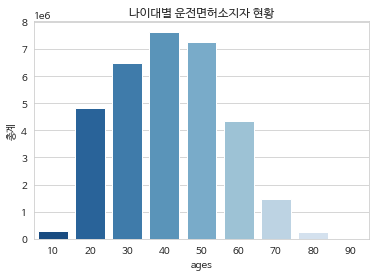

In [78]:
car_gr=car_age.groupby('ages')['총계','1종_보통','2종_보통','2종_소형','2종_합'].sum()
car_gr=car_gr.reset_index()

#나이대별 운전면허소지자 그래프
sns.barplot(x='ages',y='총계',data=car_gr,palette='Blues_r')
plt.title('나이대별 운전면허소지자 현황')

In [79]:
#2. ag데이터 정리 - 성별에 관계없이 합 변수 만들기
age2=pd.DataFrame(age.loc[:,'지역'])
age2['0']=age.loc[:,'10대미만(여자)']+age.loc[:,'10대미만(남자)']
age2['10']=age.loc[:,'10대(여자)']+age.loc[:,'10대(남자)']
age2['20']=age.loc[:,'20대(여자)']+age.loc[:,'20대(남자)']
age2['30']=age.loc[:,'30대(여자)']+age.loc[:,'30대(남자)']
age2['40']=age.loc[:,'40대(여자)']+age.loc[:,'40대(남자)']
age2['50']=age.loc[:,'50대(여자)']+age.loc[:,'50대(남자)']
age2['60']=age.loc[:,'60대(여자)']+age.loc[:,'60대(남자)']
age2['70']=age.loc[:,'70대(여자)']+age.loc[:,'70대(남자)']
age2['80']=age.loc[:,'80대(여자)']+age.loc[:,'80대(남자)']
age2['90']=age.loc[:,'90대(여자)']+age.loc[:,'90대(남자)']+age.loc[:,'100대(여자)']+age.loc[:,'100대(남자)']

In [80]:
#age 데이터에서 2~60대 거주비율 합
age2['2060']=age2.iloc[:,3]+age2.iloc[:,4]+age2.iloc[:,5]+age2.iloc[:,6]+age2.iloc[:,7]+age2.iloc[:,8]
age2['3050']=age2.iloc[:,4]+age2.iloc[:,5]+age2.iloc[:,6]
age2

,지역,0,10,20,30,40,50,60,70,80,90,2060,3050
0,경상북도,0.063353,0.117706,0.127956,0.103005,0.156273,0.159295,0.146573,0.077889,0.040573,0.007378,0.770990,0.418573
1,경상남도,0.054303,0.108825,0.135538,0.113964,0.144691,0.159442,0.156763,0.081633,0.038655,0.006185,0.792032,0.418098
2,대전광역시,0.057289,0.083282,0.125081,0.135501,0.142592,0.154570,0.158728,0.088153,0.046205,0.008598,0.804626,0.432663
3,경기도,0.077537,0.106536,0.118378,0.141036,0.161562,0.142203,0.132656,0.075148,0.037490,0.007455,0.770983,0.444801
4,전라북도,0.057154,0.119765,0.136585,0.098623,0.143650,0.155790,0.144678,0.086773,0.047690,0.009293,0.766098,0.398062
5,강원도,0.059569,0.103999,0.123531,0.114142,0.144203,0.159443,0.158437,0.080493,0.046542,0.009640,0.780250,0.417789
6,광주광역시,0.066560,0.100105,0.131960,0.131304,0.159212,0.147345,0.135516,0.080306,0.040090,0.007604,0.785641,0.437860
7,충청남도,0.063080,0.121499,0.140597,0.132398,0.152278,0.148467,0.127970,0.070977,0.035413,0.007321,0.772687,0.433143
8,부산광역시,0.044950,0.068193,0.111030,0.095915,0.122722,0.151754,0.194591,0.132131,0.068136,0.010579,0.808142,0.370390
9,제주특별자치도,0.071385,0.123174,0.138801,0.098834,0.153078,0.157333,0.129965,0.080998,0.038167,0.008263,0.759010,0.409245


In [81]:
#전국 2060 나이대 평균
age_mean=age2.loc[:,'2060'].mean()

#전국 3050 나이대 평균
age_mean2=age2.loc[:,'3050'].mean()

#train-data에 이어붙이기 - 2060
age_2060=age2.loc[:,['지역','2060']]
age_2060.columns=['지역명','age_2060']
train5=pd.merge(train4,age_2060,how='inner',on='지역명',right_index=True)

# 3050 이어붙이기
age_3050=age2.loc[:,['지역','3050']]
age_3050.columns=['지역명','age_3050']
train6=pd.merge(train5,age_3050,how='inner',on='지역명',right_index=True)
train6.head(3)

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,...,2,3,4,공가율,자격유형2,건물자격유형,수도권,광역시,age_2060,age_3050
0,60,545,0,2,0.036546,276,17.0,3,0.043093,0.078391,...,0,0,1,3.119266,A,국민임대_A,0,0,0.792032,0.418098
1,60,545,0,2,0.047269,60,17.0,3,0.059253,0.101254,...,0,0,1,3.119266,A,국민임대_A,0,0,0.792032,0.418098
2,60,545,0,2,0.047269,20,17.0,3,0.059253,0.101254,...,0,0,1,3.119266,A,국민임대_A,0,0,0.792032,0.418098


In [82]:
#평균 기준으로 높은 지역 : 1 / 낮은 지역 : 0
train6['age2_3050']=np.where(train6['age_3050']>age_mean2,1,0)
train6.head(2)

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,...,3,4,공가율,자격유형2,건물자격유형,수도권,광역시,age_2060,age_3050,age2_3050
0,60,545,0,2,0.036546,276,17.0,3,0.043093,0.078391,...,0,1,3.119266,A,국민임대_A,0,0,0.792032,0.418098,0
1,60,545,0,2,0.047269,60,17.0,3,0.059253,0.101254,...,0,1,3.119266,A,국민임대_A,0,0,0.792032,0.418098,0


In [83]:
#3. 지역별 1인당 자동차등록대수 및 주민등록인구
car1.head(2)

,지역명,1인당자동차등록대수,자동차등록대수,주민등록인구
0,서울특별시,0.3,3157361,9668465
1,부산광역시,0.4,1429040,3391946


In [84]:
#train data에 이어붙이기
train7=pd.merge(train6, car1, how='inner',on='지역명',right_index=True)
train7.head(3)

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,...,자격유형2,건물자격유형,수도권,광역시,age_2060,age_3050,age2_3050,1인당자동차등록대수,자동차등록대수,주민등록인구
0,60,545,0,2,0.036546,276,17.0,3,0.043093,0.078391,...,A,국민임대_A,0,0,0.792032,0.418098,0,0.5,1787867,3340216
1,60,545,0,2,0.047269,60,17.0,3,0.059253,0.101254,...,A,국민임대_A,0,0,0.792032,0.418098,0,0.5,1787867,3340216
2,60,545,0,2,0.047269,20,17.0,3,0.059253,0.101254,...,A,국민임대_A,0,0,0.792032,0.418098,0,0.5,1787867,3340216


In [85]:
#4. 전용면적별 가구원수
#가구당 차량 소유율은 가구원수에 영향을 받는다고 생각
gg.head(3)

,지역명,주택종류,연면적,거주인수 1명 (호),거주인수 2명 (호),거주인수 3명 (호),거주인수 4명 (호),거주인수 5명 (호),거주인주 6명 (호),거주인수 7명 이상 (호),평균 거주인 수 (명)
0,서울특별시,아파트,20㎡ 이하,28348,3996,904,423,77,15,11,1.2
1,서울특별시,아파트,20㎡ ~ 40㎡,99512,59400,22875,8575,1719,334,107,1.7
2,서울특별시,아파트,40㎡ ~ 60㎡,92893,138889,118498,75976,12801,1982,409,2.5


In [86]:
#아파트 전용면적 기술통계량확인
#임대상가는 너무 큼
train7[train7['임대건물구분']==0].describe()

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,...,4,공가율,수도권,광역시,age_2060,age_3050,age2_3050,1인당자동차등록대수,자동차등록대수,주민등록인구
count,2264.000000,2264.000000,2264.0,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,...,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03,2.264000e+03
mean,203.391343,797.431095,0.0,5.888251,0.055368,129.001767,14.185954,3.510601,0.120049,0.179285,...,0.116166,2.207119,0.054329,0.541078,0.783934,0.419348,0.541961,0.511263,1.247592e+06,2.610740e+06
std,116.768080,434.267526,0.0,5.254576,0.022317,138.415556,10.413092,2.102305,0.091731,0.119031,...,0.320495,1.977876,0.226715,0.498420,0.022294,0.022964,0.498346,0.117762,1.014253e+06,2.618432e+06
min,0.000000,26.000000,0.0,0.000000,0.005957,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.759010,0.364385,0.000000,0.300000,1.747420e+05,3.558310e+05
25%,106.000000,492.000000,0.0,0.000000,0.042065,40.000000,7.000000,3.000000,0.066569,0.104071,...,0.000000,0.808314,0.000000,0.000000,0.762642,0.409245,0.000000,0.500000,8.090990e+05,1.542840e+06
50%,201.000000,720.000000,0.0,5.000000,0.059410,89.000000,13.000000,3.000000,0.094551,0.147491,...,0.000000,1.785714,0.000000,1.000000,0.780250,0.429684,1.000000,0.500000,8.656200e+05,1.600837e+06
75%,304.250000,1005.000000,0.0,11.000000,0.068590,168.000000,21.000000,3.000000,0.148852,0.219275,...,0.000000,3.056235,0.000000,1.000000,0.797188,0.432663,1.000000,0.500000,1.429040e+06,3.340216e+06
max,410.000000,2568.000000,0.0,15.000000,0.126791,1865.000000,55.000000,14.000000,1.000000,1.000000,...,1.000000,17.500000,1.000000,1.000000,0.831050,0.484350,1.000000,0.900000,6.004126e+06,1.342701e+07


In [87]:
#train data의 전용면적 최대가 84.99 이므로 85초과 범위는 제외
gg2=gg[(gg['연면적']=='20㎡ 이하')|(gg['연면적']=='20㎡ ~ 40㎡')|(gg['연면적']=='40㎡ ~ 60㎡')|(gg['연면적']=='60㎡ ~ 85㎡')]
gg2.head(10)

,지역명,주택종류,연면적,거주인수 1명 (호),거주인수 2명 (호),거주인수 3명 (호),거주인수 4명 (호),거주인수 5명 (호),거주인주 6명 (호),거주인수 7명 이상 (호),평균 거주인 수 (명)
0,서울특별시,아파트,20㎡ 이하,28348,3996,904,423,77,15,11,1.2
1,서울특별시,아파트,20㎡ ~ 40㎡,99512,59400,22875,8575,1719,334,107,1.7
2,서울특별시,아파트,40㎡ ~ 60㎡,92893,138889,118498,75976,12801,1982,409,2.5
3,서울특별시,아파트,60㎡ ~ 85㎡,67151,175503,217750,206811,36645,6353,1415,3.0
9,부산광역시,아파트,20㎡ 이하,3226,420,115,60,10,X,X,1.2
10,부산광역시,아파트,20㎡ ~ 40㎡,37183,12399,3438,1084,195,39,13,1.4
11,부산광역시,아파트,40㎡ ~ 60㎡,64499,76433,51483,30616,4710,651,135,2.3
12,부산광역시,아파트,60㎡ ~ 85㎡,50542,113444,106237,89900,15855,2466,561,2.8
18,대구광역시,아파트,20㎡ 이하,411,63,25,32,X,X,X,1.4
19,대구광역시,아파트,20㎡ ~ 40㎡,28441,10191,2819,880,159,37,14,1.5


In [88]:
#전용면적 재범주화
change_value={
    '20㎡ 이하':0,
    '20㎡ ~ 40㎡':1,
    '40㎡ ~ 60㎡':2,
    '60㎡ ~ 85㎡':3}
gg3=gg2.replace({'연면적':change_value})
gg3.head(3)

,지역명,주택종류,연면적,거주인수 1명 (호),거주인수 2명 (호),거주인수 3명 (호),거주인수 4명 (호),거주인수 5명 (호),거주인주 6명 (호),거주인수 7명 이상 (호),평균 거주인 수 (명)
0,서울특별시,아파트,0,28348,3996,904,423,77,15,11,1.2
1,서울특별시,아파트,1,99512,59400,22875,8575,1719,334,107,1.7
2,서울특별시,아파트,2,92893,138889,118498,75976,12801,1982,409,2.5


In [89]:
#train_data도 똑같이 연면적 범주화
def func_ran(x) :
    if x<=20 :
        return 0
    elif x>20 and x<=40 :
        return 1
    elif x>40 and x<=60 :
        return 2    
    elif x>60 and x<=85 :
        return 3

train7['연면적']=train7['전용면적'].apply(lambda x:func_ran(x))
train7.head(2)

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,...,건물자격유형,수도권,광역시,age_2060,age_3050,age2_3050,1인당자동차등록대수,자동차등록대수,주민등록인구,연면적
0,60,545,0,2,0.036546,276,17.0,3,0.043093,0.078391,...,국민임대_A,0,0,0.792032,0.418098,0,0.5,1787867,3340216,0
1,60,545,0,2,0.047269,60,17.0,3,0.059253,0.101254,...,국민임대_A,0,0,0.792032,0.418098,0,0.5,1787867,3340216,0


In [90]:
train7.head(3)

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,...,건물자격유형,수도권,광역시,age_2060,age_3050,age2_3050,1인당자동차등록대수,자동차등록대수,주민등록인구,연면적
0,60,545,0,2,0.036546,276,17.0,3,0.043093,0.078391,...,국민임대_A,0,0,0.792032,0.418098,0,0.5,1787867,3340216,0
1,60,545,0,2,0.047269,60,17.0,3,0.059253,0.101254,...,국민임대_A,0,0,0.792032,0.418098,0,0.5,1787867,3340216,0
2,60,545,0,2,0.047269,20,17.0,3,0.059253,0.101254,...,국민임대_A,0,0,0.792032,0.418098,0,0.5,1787867,3340216,0


In [91]:
# test-data
#1. 연령별 운전면허소지자
#2060 merging
test3=pd.merge(test,age_2060,how='inner',on='지역명',right_index=True)

#3060 merging
test4=pd.merge(test3,age_3050,how='inner',on='지역명',right_index=True)

In [92]:
test4.head(2)

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,...,공급유형,지역명,cluster,공가율,자격유형2,건물자격유형,수도권,광역시,age_2060,age_3050
0,52,754,0,0,39.79,116,14.0,8,22830000.0,189840.0,...,국민임대,경기도,1,1.856764,H,국민임대_H,0,1,0.770983,0.444801
2,52,754,0,0,46.90,112,14.0,8,36048000.0,249930.0,...,국민임대,경기도,1,1.856764,H,국민임대_H,0,1,0.770983,0.444801


In [93]:
#평균 기준으로 높은 지역 : 1 / 낮은 지역 : 0
test4['age2_3050']=np.where(test4['age_3050']>age_mean2,1,0)
test4.head(2)

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,...,지역명,cluster,공가율,자격유형2,건물자격유형,수도권,광역시,age_2060,age_3050,age2_3050
0,52,754,0,0,39.79,116,14.0,8,22830000.0,189840.0,...,경기도,1,1.856764,H,국민임대_H,0,1,0.770983,0.444801,1
2,52,754,0,0,46.90,112,14.0,8,36048000.0,249930.0,...,경기도,1,1.856764,H,국민임대_H,0,1,0.770983,0.444801,1


In [94]:
#3. 지역별 1인당 자동차등록대수 및 주민등록인구
test5=pd.merge(test4,car1,how='inner',on='지역명',right_index=True)
test5.head(3)

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,...,자격유형2,건물자격유형,수도권,광역시,age_2060,age_3050,age2_3050,1인당자동차등록대수,자동차등록대수,주민등록인구
0,52,754,0,0,39.79,116,14.0,8,22830000.0,189840.0,...,H,국민임대_H,0,1,0.770983,0.444801,1,0.4,6004126,13427014
2,52,754,0,0,46.90,112,14.0,8,36048000.0,249930.0,...,H,국민임대_H,0,1,0.770983,0.444801,1,0.4,6004126,13427014
3,52,754,0,0,46.90,120,14.0,8,36048000.0,249930.0,...,H,국민임대_H,0,1,0.770983,0.444801,1,0.4,6004126,13427014


In [95]:
#연면적
test5['연면적']=test5['전용면적'].apply(lambda x:func_ran(x))
test5.head(2)

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,...,건물자격유형,수도권,광역시,age_2060,age_3050,age2_3050,1인당자동차등록대수,자동차등록대수,주민등록인구,연면적
0,52,754,0,0,39.79,116,14.0,8,22830000.0,189840.0,...,국민임대_H,0,1,0.770983,0.444801,1,0.4,6004126,13427014,1.0
2,52,754,0,0,46.90,112,14.0,8,36048000.0,249930.0,...,국민임대_H,0,1,0.770983,0.444801,1,0.4,6004126,13427014,2.0


In [96]:
train7.head(2)

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,...,건물자격유형,수도권,광역시,age_2060,age_3050,age2_3050,1인당자동차등록대수,자동차등록대수,주민등록인구,연면적
0,60,545,0,2,0.036546,276,17.0,3,0.043093,0.078391,...,국민임대_A,0,0,0.792032,0.418098,0,0.5,1787867,3340216,0
1,60,545,0,2,0.047269,60,17.0,3,0.059253,0.101254,...,국민임대_A,0,0,0.792032,0.418098,0,0.5,1787867,3340216,0


In [97]:
test5.head(2)

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,...,건물자격유형,수도권,광역시,age_2060,age_3050,age2_3050,1인당자동차등록대수,자동차등록대수,주민등록인구,연면적
0,52,754,0,0,39.79,116,14.0,8,22830000.0,189840.0,...,국민임대_H,0,1,0.770983,0.444801,1,0.4,6004126,13427014,1.0
2,52,754,0,0,46.90,112,14.0,8,36048000.0,249930.0,...,국민임대_H,0,1,0.770983,0.444801,1,0.4,6004126,13427014,2.0


<AxesSubplot:>

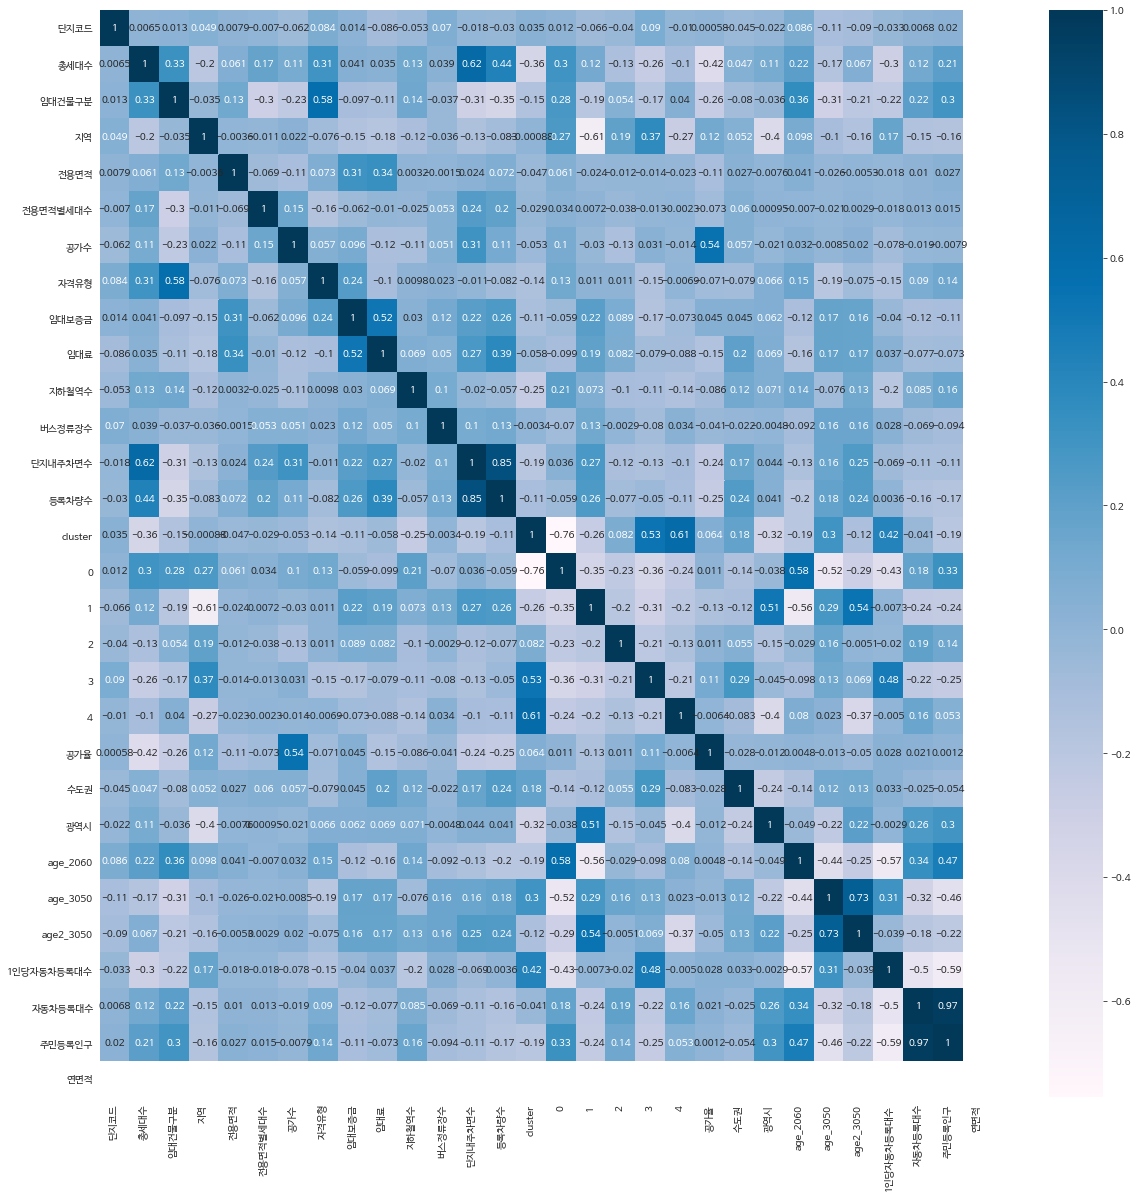

In [98]:
plt.figure(figsize=(20,20))
sns.heatmap(train7.corr(),annot=True,cmap=plt.cm.PuBu,linecolor='white')

In [99]:
#파생변수 추가해서 데이터 저장

train7.to_csv('train_add.csv',header=True,index=False)
test5.to_csv('test_add.csv',header=True,index=False)

#### 변수 수정 ####

In [100]:
train7.columns

Index([      '단지코드',       '총세대수',     '임대건물구분',         '지역',       '전용면적',
         '전용면적별세대수',        '공가수',       '자격유형',      '임대보증금',        '임대료',
            '지하철역수',     '버스정류장수',    '단지내주차면수',       '공급유형',      '등록차량수',
              '지역명',    'cluster',            0,            1,            2,
                  3,            4,        '공가율',      '자격유형2',     '건물자격유형',
              '수도권',        '광역시',   'age_2060',   'age_3050',  'age2_3050',
       '1인당자동차등록대수',    '자동차등록대수',     '주민등록인구',        '연면적'],
      dtype='object')

In [101]:
test5.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '전용면적', '전용면적별세대수', '공가수', '자격유형',
       '임대보증금', '임대료', '지하철역수', '버스정류장수', '단지내주차면수', '공급유형', '지역명', 'cluster',
       '공가율', '자격유형2', '건물자격유형', '수도권', '광역시', 'age_2060', 'age_3050',
       'age2_3050', '1인당자동차등록대수', '자동차등록대수', '주민등록인구', '연면적'],
      dtype='object')

In [102]:
#1.test data에 cluster 더미변수 만들기
dummy1=pd.get_dummies(test5['cluster'])
test5=pd.concat([dummy1,test5],axis=1)

In [103]:
#2.변수제거
#'건물자격유형'=>train,test 각각 맞지 않으므로 제거
#'연면적'=>상가데이터에는 존재하지 않으므로 제거
train7=train7.drop(['건물자격유형','연면적'],axis=1)
test5=test5.drop(['건물자격유형','연면적'],axis=1)

In [104]:
#3.수도권/비수도권 및 광역시/비광역시 변수 수정
train7=train7.drop(['수도권','광역시'],axis=1)
test5=test5.drop(['수도권','광역시'],axis=1)

#수도권
수도권=['서울특별시','경기도']
비수도권=['경상남도', '대전광역시', '전라북도', '강원도', '광주광역시', '충청남도', '부산광역시',
       '제주특별자치도', '울산광역시', '충청북도', '전라남도', '경상북도', '대구광역시',
       '세종특별자치시']

train7['수도권']=np.where(train7['지역명'].isin(수도권),'수도권','비수도권')
test5['수도권']=np.where(test5['지역명'].isin(수도권),'수도권','비수도권')

#광역시(특별시)
광역시=['대구광역시','세종특별자치시','제주특별자치도','울산광역시','대구광역시','광주광역시','부산광역시','서울특별시']
비광역시=['충청북도','경상남도','경상북도','전라남도','강원도','충청남도','경기도','전라북도']

train7['광역시']=np.where(train7['지역명'].isin(광역시),'광역시','비광역시')
test5['광역시']=np.where(test5['지역명'].isin(광역시),'광역시','비광역시')

In [105]:
train_real=pd.read_csv('train_real.csv') #전체 train 데이터
test_real=pd.read_csv('test_real.csv') #전체 test 데이터

In [106]:
#4.단지코드명(나중에 붙일용도)
train_단지코드명=pd.DataFrame(train_real.단지코드명)
test_단지코드명=pd.DataFrame(test_real.단지코드명)

In [107]:
#5.더미변수화(수도권/비수도권)
dummy3=pd.get_dummies(train7['수도권'])
dummy4=pd.get_dummies(train7['광역시'])

train7=pd.concat([dummy3,dummy4,train7],axis=1)
train7=train7.drop(['수도권','광역시'],axis=1)

dummy31=pd.get_dummies(test5['수도권'])
dummy41=pd.get_dummies(test5['광역시'])

test5=pd.concat([dummy31,dummy41,test5],axis=1)
test5=test5.drop(['수도권','광역시'],axis=1)

In [115]:
#6.범주형 더미변수만들기

#train
dummy1=pd.get_dummies(train7['지역명'])
dummy2=pd.get_dummies(train7['자격유형'])

train7=pd.concat([dummy1,dummy2,train7],axis=1)
train7=train7.drop(['지역명','자격유형'],axis=1)

#test
dummy11=pd.get_dummies(test5['지역명'])
dummy21=pd.get_dummies(test5['자격유형'])

test5=pd.concat([dummy11,dummy21,test5],axis=1)
test5=test5.drop(['지역명','자격유형'],axis=1)

In [116]:
test5.shape

(1008, 51)

In [117]:
train7.shape

(2549, 55)

In [121]:
#train,test변수 맞춰주기
train7=train7.drop(['서울특별시',13,14],axis=1)

In [127]:
train7.columns

Index([       '강원도',        '경기도',       '경상남도',       '경상북도',      '광주광역시',
            '대구광역시',      '대전광역시',      '부산광역시',    '세종특별자치시',      '울산광역시',
             '전라남도',       '전라북도',    '제주특별자치도',       '충청남도',       '충청북도',
                  0,            1,            2,            3,            4,
                  6,            8,       '비수도권',       '비광역시',       '단지코드',
             '총세대수',     '임대건물구분',         '지역',       '전용면적',   '전용면적별세대수',
              '공가수',      '임대보증금',        '임대료',      '지하철역수',     '버스정류장수',
          '단지내주차면수',       '공급유형',      '등록차량수',    'cluster',            0,
                  1,            2,            3,            4,        '공가율',
            '자격유형2',   'age_2060',   'age_3050',  'age2_3050', '1인당자동차등록대수',
          '자동차등록대수',     '주민등록인구'],
      dtype='object')

In [129]:
train7.head(1)

,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,세종특별자치시,울산광역시,...,3,4,공가율,자격유형2,age_2060,age_3050,age2_3050,1인당자동차등록대수,자동차등록대수,주민등록인구
0,0,0,1,0,0,0,0,0,0,0,...,0,1,3.119266,A,0.792032,0.418098,0,0.5,1787867,3340216


In [130]:
#스케일링을 위한 변수 자리바꾸기 
train7=train7.drop(['공급유형','자격유형2'],axis=1)
test5=test5.drop(['공급유형','자격유형2'],axis=1)

train7_target=train7.loc[:,['등록차량수']]
train7=train7.drop(['등록차량수'],axis=1)
train7=pd.concat([train7,train7_target],axis=1)

In [133]:
#스케일링
scaler=MinMaxScaler()

#train
train_scaled=train7.iloc[:,:-1]
scaler.fit(train_scaled)
train_scaled=scaler.transform(train_scaled)

train7.iloc[:,:-1]=train_scaled

#test
test_scaled=test5.iloc[:,:]
scaler.fit(test_scaled)
test_scaled=scaler.transform(test_scaled)

test5.iloc[:,:]=test_scaled

In [136]:
#train set에서 학습/테스트데이터 분할
x_data=train7.iloc[:,:-1]
y_data=train7.loc[:,'등록차량수']

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,shuffle=True,random_state=12)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(2039, 49) (2039,)
(510, 49) (510,)


##### 1. 선형회귀 OLS

In [138]:
import statsmodels.api as sm
model=sm.OLS(y_train,x_train)
fit_model=model.fit()
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  등록차량수   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     250.3
Date:                Sun, 03 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:06:31   Log-Likelihood:                -13571.
No. Observations:                2039   AIC:                         2.721e+04
Df Residuals:                    2004   BIC:                         2.741e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
강원도          -32.7356     15.584     -2.101      0.036     -63.298      -2.173
경기도          -37.8191     15.035     -2.515      0.012     -67.305      -8.333
경상남도         -35.4137      6.741     -5.253      0.000     -48.634     -22.194
경상북도         277.4538     32.613      8.507      0.000     213.494     341.413
광주광역시        116.6154     17.470      6.675      0.000      82.355     150.876
대구광역시          0.3552     18.835      0.019      0.985     -36.584      37.294
대전광역시        -36.7879     15.773     -2.332      0.020     -67.722      -5.854
부산광역시         83.5554     15.767      5.300      0.000      52.635     114.476
세종특별자치시      -86.5342     23.227     -3.726      0.000    -132.087     -40.982
울산광역시        -52.7336     17.486     -3.016      0.003     -87.026     -18.441
전라남도         -88.3630     30.920     -2.858      0.004    -149.002     -27.724
전라북도        -102.5593     17.268     -5.939      0.000    -136.425     -68.693
제주특별자치도      -65.8225     12.269     -5.365      0.000     -89.884     -41.761
충청남도          89.9840     18.357      4.902      0.000      53.983     125.985
충청북도         -13.6227     11.299     -1.206      0.228     -35.781       8.536
0            124.5624     59.186      2.105      0.035       8.489     240.636
1            -10.5831     56.945     -0.186      0.853    -122.260     101.094
2            -52.2349     60.150     -0.868      0.385    -170.198      65.728
3             42.0210     48.424      0.868      0.386     -52.945     136.987
4             51.5871     69.908      0.738      0.461     -85.513     188.687
6              5.9735     54.063      0.110      0.912    -100.052     111.999
8             94.4686     50.624      1.866      0.062      -4.812     193.749
비수도권          53.3910     17.533      3.045      0.002      19.007      87.775
비광역시          20.1363     10.783      1.867      0.062      -1.011      41.283
단지코드         -31.3951     15.805     -1.986      0.047     -62.391      -0.399
총세대수         -19.1702     51.896     -0.369      0.712    -120.945      82.605
임대건물구분      -153.0500     30.465     -5.024      0.000    -212.797     -93.303
지역           -12.0746     11.836     -1.020      0.308     -35.286      11.137
전용면적         -49.9517     81.807     -0.611      0.542    -210.387     110.484
전용면적별세대수     152.0364     66.133      2.299      0.022      22.340     281.733
공가수         -489.3765     34.660    -14.119      0.000    -557.351    -421.402
임대보증금        158.6678     85.796      1.849      0.065      -9.591     326.926
임대료          380.7991     56.223      6.773      0.000     270.538     491.060
지하철역수       -147.4866     35.817     -4.118      0.000    -217.728     -77.245
버스정류장수       206.2295     32.684      6.310      0.000     142.130     270.329
단지내주차면수     1657.5373     48.000     34.532      0.000    1563.403    1751.672
cl

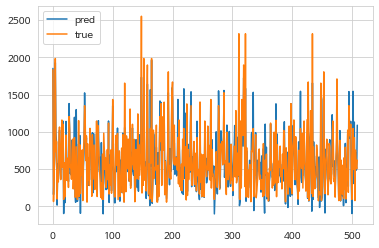

In [139]:
#test set에서 성능확인
plt.plot(np.array(fit_model.predict(x_test)),label='pred')
plt.plot(np.array(y_test),label='true')
plt.legend()
plt.show()

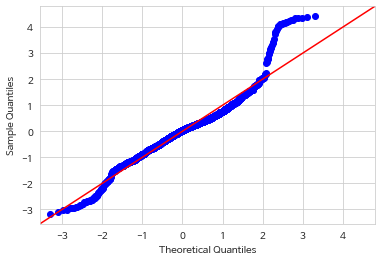

In [140]:
# 잔차 확인
resid = fit_model.resid
fig = sm.qqplot(resid,fit=True,line='45')

In [142]:
#Cook's distance를 이용하여 극단값 확인
from statsmodels.stats.outliers_influence import OLSInfluence

cd,_=OLSInfluence(fit_model).cooks_distance
cd.sort_values(ascending=False).head()

1856    0.015604
1858    0.015003
1857    0.014904
127     0.011532
1695    0.011186
dtype: float64

- 크게 유의한 극단값은 없어보임

In [143]:
# 변수 후진 소거법
varlist = x_data.columns.tolist()
y = y_data

sv_per_step = []
ad_r = []
steps = []

step = 0

while len(varlist) > 0 :
    X = sm.add_constant(x_data[varlist])
    p_values = sm.OLS(y,X).fit().pvalues[1:]
    max_pval = p_values.max()
    
    if max_pval >= 0.05 :
        remove_var = p_values.idxmax()
        varlist.remove(remove_var)
        
        step +=1
        steps.append(step)
        adj_r = sm.OLS(y,sm.add_constant(x_data[varlist]))
        ad_r.append(adj_r)
        sv_per_step.append(varlist.copy())
    
    else :
        break

In [144]:
varlist

['경상북도',
 '광주광역시',
 '대구광역시',
 '울산광역시',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도',
 8,
 '단지코드',
 '임대건물구분',
 '지역',
 '공가수',
 '임대보증금',
 '임대료',
 '지하철역수',
 '버스정류장수',
 '단지내주차면수',
 '공가율',
 'age2_3050']

In [145]:
#train-test set 분할
x_data3=train7[varlist]
y_data3=train7.loc[:,'등록차량수']

x_train3,x_test3,y_train3,y_test3=train_test_split(x_data3,y_data3,test_size=0.2,shuffle=True,random_state=12)
print(x_train3.shape,y_train3.shape)
print(x_test3.shape,y_test3.shape)

model3=sm.OLS(y_train3,x_train3)
fit_model3=model3.fit()
fit_model3.summary()

(2039, 20) (2039,)
(510, 20) (510,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  등록차량수   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              1395.
Date:                Sun, 03 Oct 2021   Prob (F-statistic):                        0.00
Time:                        00:07:45   Log-Likelihood:                         -13584.
No. Observations:                2039   AIC:                                  2.721e+04
Df Residuals:                    2019   BIC:                                  2.732e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
경상북도         355.8787     47.926      7.426      0.000     261.888     449.869
광주광역시        169.9445     24.466      6.946      0.000     121.963     217.926
대구광역시        138.1317     23.301      5.928      0.000      92.436     183.827
울산광역시        -59.6909     22.622     -2.639      0.008    -104.056     -15.326
전라북도         -71.7702     25.183     -2.850      0.004    -121.157     -22.383
제주특별자치도      -33.3965     19.402     -1.721      0.085     -71.446       4.653
충청남도         221.3539     24.951      8.872      0.000     172.421     270.286
충청북도         143.8758     20.404      7.052      0.000     103.862     183.890
8             54.2659     17.509      3.099      0.002      19.928      88.604
단지코드         -42.7558     14.349     -2.980      0.003     -70.896     -14.616
임대건물구분      -170.6780     22.732     -7.508      0.000    -215.258    -126.098
지역           125.7270     19.927      6.309      0.000      86.647     164.807
공가수         -480.4031     33.098    -14.515      0.000    -545.312    -415.494
임대보증금         99.1513     62.507      1.586      0.113     -23.433     221.735
임대료          397.2619     45.730      8.687      0.000     307.578     486.945
지하철역수       -152.0831     32.918     -4.620      0.000    -216.640     -87.526
버스정류장수       202.8232     31.076      6.527      0.000     141.878     263.768
단지내주차면수     1659.1266     27.413     60.523      0.000    1605.365    1712.888
공가율          165.9985     53.300      3.114      0.002      61.470     270.527
age2_3050   -124.5262     16.162     -7.705      0.000    -156.221     -92.831
==============================================================================
Omnibus:                      247.365   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              925.072
Skew:                           0.559   Prob(JB):                    1.33e-201
Kurtosis:                       6.104   Cond. No.                         18.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 변수선택법하고 성능 개선

In [146]:
test6=test5[varlist] #선택된 변수 test데이터에 적용

In [149]:
fit_model3.predict(test6)

0      575.465859
2      627.111411
3      627.111411
4      665.386429
5      665.386429
          ...    
624    232.864000
706    739.023040
707    739.023040
708    739.023040
709    739.023040
Length: 1008, dtype: float64

In [150]:
sub1=pd.concat([test_단지코드명,pd.DataFrame(fit_model3.predict(test6))],axis=1)

In [152]:
sub1.columns=['code','num']
sub1=sub1.groupby('code')['num'].mean().reset_index()

In [154]:
sub1.to_csv('sub1_ols.csv')

##### 2. Random forest

In [156]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf=RandomForestRegressor(max_depth=3,random_state=12)
rf.fit(x_train,y_train)

y_train_pred=rf.predict(x_train)
train_mse=mean_squared_error(y_train,y_train_pred)
print('Train MSE:%.4f'%train_mse)

y_test_pred=rf.predict(x_test)
test_mse=mean_squared_error(y_test,y_test_pred)
print('Test MSE:%.4f'%test_mse)

Train MSE:28603.3562
Test MSE:31467.6623


In [157]:
pd.DataFrame(rf.predict(test5))

,0
0,557.316790
1,557.316790
2,557.316790
3,557.316790
4,557.316790
...,...
1003,1318.375143
1004,139.198323
1005,139.198323
1006,139.198323


In [158]:
sub2=pd.concat([test_단지코드명,pd.DataFrame(rf.predict(test5))],axis=1)

In [159]:
sub2.columns=['code','num']
sub2=sub2.groupby('code')['num'].mean().reset_index()

In [161]:
sub2.to_csv('sub2_rf.csv')

###### 성능 R-square / score 값 참고

In [162]:
final_train=train7
final_test=test5

In [163]:
# 2. Random Forest Regressor - 전체

X = final_train.drop(['등록차량수'],axis=1)
y = final_train['등록차량수']
x_train, x_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.33)


params ={
    'n_estimators':[600, 800, 1000],
    'max_depth':[12, 14, 16],
    'min_samples_leaf':[2, 4, 6],
    'min_samples_split':[2, 4, 6]
}

rf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(x_train,y_train)
print('최선의 parameter: ', grid_cv.best_params_)
print('최선의 score: ',grid_cv.best_score_)

최선의 parameter:  {'max_depth': 16, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1000}
최선의 score:  0.9565946901555709


R_squared:  0.9950016457770049
mean_squared_error:  2787.32005822876


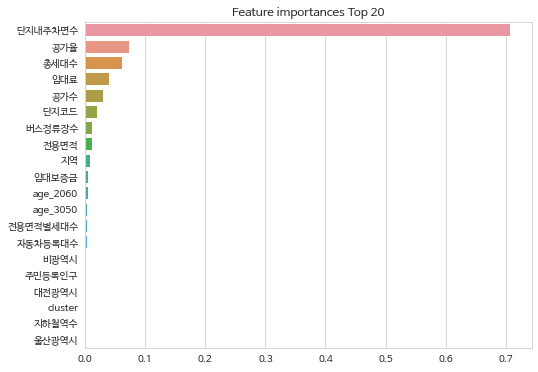

In [164]:
RFmodel = RandomForestRegressor(n_estimators = 800, max_depth = 14, min_samples_leaf = 2, min_samples_split = 2, random_state = 1234)
RFmodel.fit(x_train, y_train)
y_pred = RFmodel.predict(x_val)

# R^2 score
residuals = y_val - y_pred
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared: ', R_squared)

# MSE
mse = mean_squared_error(y_val, y_pred)
print('mean_squared_error: ', mse)

# 변수중요도
importances_values = RFmodel.feature_importances_
importances = pd.Series(importances_values, index=x_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()